

# Convolutional neural network for fresh and rotten fruit detection

##Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

## Loading the images




In [ ]:
#mounting Google Drive in Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extracting Zip file from Google drive to Google Colab

path = '/content/drive/MyDrive/freshrot.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

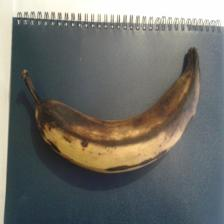

In [ ]:
#Image is displayed from training dataset

load_img('/content/FRUIT-16K/train/F_Banana/1.jpg')

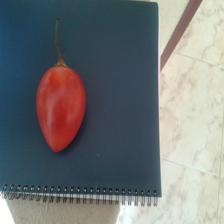

In [ ]:
load_img('/content/FRUIT-16K/train/F_Tamarillo/10.jpg')

## Train and test set

In [ ]:
# We can configure some parameters to make modifications to the original images,
# which is very useful when we have few images of each class.
# As you can see here, there are many other parameters that can be configured.
# Using this function, in addition to the original images, we will also have new images
# with application of these pre-processing
#1. is used to ensure the division performed as a floating point operation
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
# Indicates that the images will be accessed every eight. As we have few images, we put this small value

# As the name suggests, this parameter will mix the images,
# they will be accessed in a completely random order to prevent the neural network
# from memorizing the order of the images. Otherwise, the neural network could
# learn the order of the images and not their features
train_dataset = training_generator.flow_from_directory('/content/FRUIT-16K/train',
                                                        target_size = (224, 224),
                                                        batch_size = 64,
                                                        class_mode = 'categorical',
                                                       shuffle = True)

Found 11200 images belonging to 16 classes.


In [ ]:
# To test, we set this parameter to FALSE because when testing,
# the order of the images makes no difference.
# If we leave the value equals TRUE, we will not be able to associate the
# predictions with the expected outputs
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/FRUIT-16K/test',
                                                     target_size = (224, 224),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 4800 images belonging to 16 classes.


## Building and training the neural network

In [ ]:
#Building 5 convolutional layers with 3x3X32(image_height,image_width,Channels)filters
#ReLu Activation Function is used
#5 Maxpooling are used, each using size 2x2
#All these layers are converted into 1D through Flatten for using Fully Connected(Dense) Layers
#Finally the Output Layer contains 6 classes and softmax activation is used

network=Sequential()
network.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))


network.add(Conv2D(64,(3,3),activation='relu'))


network.add(Conv2D(64,(3,3),activation='relu'))



network.add(Flatten())

network.add(Dense(units=577,activation='relu'))
network.add(Dense(units=577,activation='relu'))
network.add(Dense(units=16,activation='softmax'))

In [ ]:
#Preparing or Configuring the model for training
#Adam optimizer is used for updating weights during back propagation
#Categorical_crossentropy is used for loss parameter to explain how well the model explains with observed data.
#loss function is the difference between actual and predicted values
#Accuracy is used to evaluate the model with the test data

network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#training the model with 20 epochs

history = network.fit_generator(train_dataset, epochs=5)

<ipython-input-56-86fc75ae5a99>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset, epochs=5)


Epoch 1/5
175/175 [==============================] - 142s 803ms/step - loss: 1.7258 - accuracy: 0.4004
Epoch 2/5
175/175 [==============================] - 145s 824ms/step - loss: 0.7338 - accuracy: 0.7364
Epoch 3/5
175/175 [==============================] - 144s 822ms/step - loss: 0.4405 - accuracy: 0.8471
Epoch 4/5
175/175 [==============================] - 144s 823ms/step - loss: 0.3061 - accuracy: 0.8942
Epoch 5/5
175/175 [==============================] - 145s 826ms/step - loss: 0.1929 - accuracy: 0.9352


## Evaluating the neural network

In [ ]:
#Displaying the class names with corresponding index values
test_dataset.class_indices

{'F_Banana': 0,
 'F_Lemon': 1,
 'F_Lulo': 2,
 'F_Mango': 3,
 'F_Orange': 4,
 'F_Strawberry': 5,
 'F_Tamarillo': 6,
 'F_Tomato': 7,
 'S_Banana': 8,
 'S_Lemon': 9,
 'S_Lulo': 10,
 'S_Mango': 11,
 'S_Orange': 12,
 'S_Strawberry': 13,
 'S_Tamarillo': 14,
 'S_Tomato': 15}

In [ ]:
#Predictions on the test data
#Predictions will gives the probability of the test image with each class
predictions = network.predict(test_dataset)
predictions

  82/4800 [..............................] - ETA: 1:17

In [ ]:
#convert the output of a neural network
#typically it consists of probabilities for each class
#selecting the index value of the class with the highest probability (argmax).
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 0, ..., 7, 7, 6])

In [ ]:
#classes of your actaul test dataset

test_dataset.classes

In [ ]:
#Accuracy is measured using actual data with predicted data
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.39958333333333335

Text(50.722222222222214, 0.5, 'True Labels')

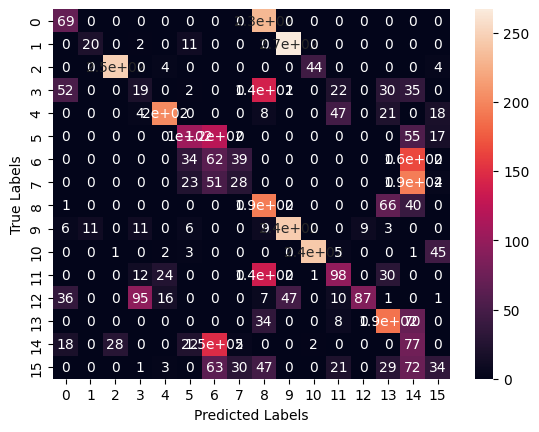

In [ ]:
#Confusion matrix based on the true labels from your test dataset and the predictions made by your model.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

## Classifying one single image

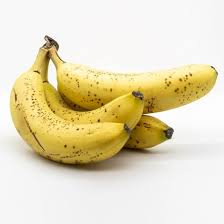

In [ ]:
#Test with an image
img = cv2.imread('/content/fbanana.jpg')
cv2_imshow(img)

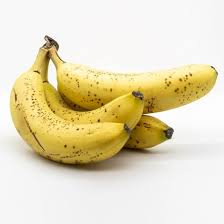

In [ ]:
#Resizing the images as 224x224
img = cv2.resize(img, (224, 224))
cv2_imshow(img)

array([[[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       ...,

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]]], dtype=uint8)
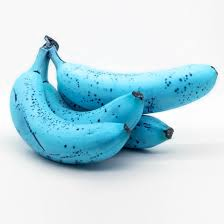

In [ ]:
img

In [ ]:
#Convert the pixel values between 0 to 1
image = img / 255
image

array([[[0.97254902, 0.97254902, 0.97254902],
        [0.97254902, 0.97254902, 0.97254902],
        [0.97254902, 0.97254902, 0.97254902],
        ...,
        [0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431]],

       [[0.97254902, 0.97254902, 0.97254902],
        [0.97254902, 0.97254902, 0.97254902],
        [0.97254902, 0.97254902, 0.97254902],
        ...,
        [0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431]],

       [[0.97254902, 0.97254902, 0.97254902],
        [0.97254902, 0.97254902, 0.97254902],
        [0.97254902, 0.97254902, 0.97254902],
        ...,
        [0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431]],

       ...,

       [[0.96470588, 0.96470588, 0.96470588],
        [0.96470588, 0.96470588, 0.96470588],
        [0.96470588, 0

In [ ]:
#Shape of the image
image.shape

(224, 224, 3)

In [ ]:
#Adding an extra dimension to your numpy array image.
#This is often done when you want to preprocess a single image before passing it through a model that expects batched input.
#it will have shape (batch_size, height, width, channels)
image =  np.expand_dims(image, axis=0)
image.shape

(1, 224, 224, 3)

In [ ]:
#Prediction(Probabilities) on the test image with each classes
result = network.predict(image)
result

1/1 [==============================] - 0s 99ms/step


array([[1.07060487e-12, 9.99897242e-01, 6.34991282e-10, 2.93782082e-10,
        2.17067884e-15, 2.46375521e-06, 4.02099022e-06, 4.66438360e-05,
        8.90277876e-15, 4.94875021e-05, 1.02373626e-07, 3.65492532e-12,
        7.47263051e-09, 4.16708725e-12, 3.40286508e-14, 2.19293672e-09]],
      dtype=float32)

In [ ]:
#Taking the index values with highest probability
res = np.argmax(result)
res

1

In [ ]:
#Creating a list with each index value has its corresponding class names
class_labels = ['fresh banana', 'fresh lemon','fresh lulo','fresh Mango','fresh orange', 'fresh strawbwerry','fresh Tamarillo','fresh tomato',
                'rotten banana', 'rotten lemon','rotten lulo','rotten Mango','rotten orange', 'rotten strawbwerry','rotten Tamarillo','rotten tomato',]

In [ ]:
#Predicted class is displayed
#If the probability of the predicted class is greater than 0.65, it display the Predicted Class
#Otherwise it display Unknown
predicted_class = class_labels[res]
if(result[0][res]>=0.65):# Assuming you have a list of class labels
      print("Predicted vegetable:", predicted_class)
else:
      print("unknown")

Predicted vegetable: fresh lemon
